In [39]:
from sklearn.preprocessing import PolynomialFeatures
# from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
# import smogn
from scipy.optimize import minimize
from scipy import stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import svm
import numpy as np
import seaborn as sns
from scipy.stats import norm
import random
import math
import matplotlib.collections
from itertools import combinations
import networkx as nx

np.set_printoptions(threshold=np.inf)
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

np.set_printoptions(threshold=np.inf)


## File names:

In [2]:
# FN = File Name


normalized_clean_data_FN = 'normalized_clean_data_red.csv'
oversampled_clean_data_FN = 'oversampled_clean_data_red.csv'
clean_data_FN = 'clean_red.csv'

# normalized_clean_data_FN = 'normalized_clean_data_white.csv'
# oversampled_clean_data_FN = 'oversampled_clean_data_white.csv'
# clean_data_FN = 'clean_white.csv'

In [3]:
%matplotlib inline
# %matplotlib qt5

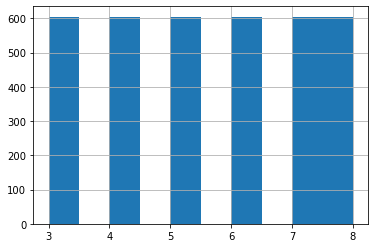

In [4]:
data = pd.read_csv(normalized_clean_data_FN)
X = data.drop(['quality'], axis=1)
Y = data['quality']
data.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Y.hist()

# Question 1.a - Regrestion
##### we'll try out three regresion models and compair them.
##### 1. linear and polynomial regrestion
##### 2. SVM Regresor
##### 3. neural network regresor

## Linear Regrestion

In [7]:
reg = LinearRegression().fit(X_train, Y_train)
print('linear regression r2 score = ', reg.score(X_test, Y_test))

a = reg.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('linear regression train_mse =', train_mse)
b = reg.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('linear regression test_mse =', test_mse)

linear regression r2 score =  0.7529734249483405
linear regression train_mse = 0.7642325965151983
linear regression test_mse = 0.6844100640010435


## Polynomial Regression

In [8]:
p_reg = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, Y_train)
p_reg.named_steps['linear'].coef_

from sklearn.metrics import mean_squared_error

print('polynomial regression r2 score = ', p_reg.score(X_test, Y_test))
a = p_reg.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('polynomial regression train_mse =', train_mse)
b = p_reg.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('polynomial regression test_mse =', test_mse)

polynomial regression r2 score =  0.8654955628975651
polynomial regression train_mse = 0.20803542808036687
polynomial regression test_mse = 0.37265703249316584


## SVM Regresors
#### 1. rbf kernel
#### 2. linear kernel
#### 3. polynomial kernel

In [9]:
SVR_rbf = svm.SVR(kernel='rbf')
SVR_lin = svm.SVR(kernel='linear')
SVR_poly = svm.SVR(kernel='poly', degree=2)
SVR_rbf.fit(X_train, Y_train)
SVR_lin.fit(X_train, Y_train)
SVR_poly.fit(X_train, Y_train)

print('SVR_rbf score = ', SVR_rbf.score(X_train, Y_train))
a = SVR_rbf.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_rbf train_mse = ', train_mse)
b = SVR_rbf.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_rbf test_mse = ', test_mse, '\n')

print('SVR_lin score = ', SVR_lin.score(X_train, Y_train))
a = SVR_lin.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_lin train_mse = ', train_mse)
b = SVR_lin.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_lin test_mse = ', test_mse, '\n')

print('SVR_poly score = ', SVR_poly.score(X_train, Y_train))
a = SVR_poly.predict(X_train)
train_mse = (mean_squared_error(a, Y_train))
print('SVR_poly train_mse = ', train_mse)
b = SVR_poly.predict(X_test)
test_mse = (mean_squared_error(b, Y_test))
print('SVR_poly test_mse = ', test_mse)


SVR_rbf score =  0.9239008302360312
SVR_rbf train_mse =  0.22473331147302306
SVR_rbf test_mse =  0.23490603172684763 

SVR_lin score =  0.7319645812108253
SVR_lin train_mse =  0.7915524892502884
SVR_lin test_mse =  0.691525124767056 

SVR_poly score =  0.4969896401632682
SVR_poly train_mse =  1.4854719732418027
SVR_poly test_mse =  1.627065833796946


# Deep Neural Network Regresor

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.models import Model
import tensorflow as tf

In [11]:
DNN_model_selu = Sequential()
DNN_model_selu.add(Dense(100, input_dim=11, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(128, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(128, activation= "selu"))
DNN_model_selu.add(Dropout(0.1))
DNN_model_selu.add(Dense(2, activation= "selu"))
DNN_model_selu.add(Dense(1))

In [12]:
DNN_model_relu = Sequential()
DNN_model_relu.add(Dense(100, input_dim=11, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(128, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(128, activation= "relu"))
DNN_model_relu.add(Dropout(0.1))
DNN_model_relu.add(Dense(2, activation= "relu"))
DNN_model_relu.add(Dense(1))

In [13]:
DNN_model_soft_max = Sequential()
DNN_model_soft_max.add(Dense(100, input_dim=11, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(128, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(128, activation= "softmax"))
DNN_model_soft_max.add(Dropout(0.1))
DNN_model_soft_max.add(Dense(2, activation= "softmax"))
DNN_model_soft_max.add(Dense(1))

In [14]:
DNN_model_selu.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
selu_history = DNN_model_selu.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Epoch 1/100
64/64 [==============================] - 3s 16ms/step - loss: 13.2309 - mean_squared_error: 13.2309 - val_loss: 0.9240 - val_mean_squared_error: 0.9240
Epoch 2/100
64/64 [==============================] - 1s 8ms/step - loss: 1.6105 - mean_squared_error: 1.6105 - val_loss: 0.6714 - val_mean_squared_error: 0.6714
Epoch 3/100
64/64 [==============================] - 1s 8ms/step - loss: 1.2646 - mean_squared_error: 1.2646 - val_loss: 0.7082 - val_mean_squared_error: 0.7082
Epoch 4/100
64/64 [==============================] - 1s 8ms/step - loss: 1.2039 - mean_squared_error: 1.2039 - val_loss: 0.5938 - val_mean_squared_error: 0.5938
Epoch 5/100
64/64 [==============================] - 1s 8ms/step - loss: 1.0336 - mean_squared_error: 1.0336 - val_loss: 0.5794 - val_mean_squared_error: 0.5794
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.9093 - mean_squared_error: 0.9093 - val_loss: 0.5515 - val_mean_squared_error: 0.5515
Epoch 7/100
64/64 [============

64/64 [==============================] - 1s 8ms/step - loss: 0.4458 - mean_squared_error: 0.4458 - val_loss: 0.3199 - val_mean_squared_error: 0.3199
Epoch 52/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4448 - mean_squared_error: 0.4448 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 53/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4426 - mean_squared_error: 0.4426 - val_loss: 0.4505 - val_mean_squared_error: 0.4505
Epoch 54/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4810 - mean_squared_error: 0.4810 - val_loss: 0.3275 - val_mean_squared_error: 0.3275
Epoch 55/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4616 - mean_squared_error: 0.4616 - val_loss: 0.3413 - val_mean_squared_error: 0.3413
Epoch 56/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4263 - mean_squared_error: 0.4263 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 57/100
64/64 [=====================

In [15]:
DNN_model_relu.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
relu_history = DNN_model_relu.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Epoch 1/100
64/64 [==============================] - 3s 17ms/step - loss: 16.4323 - mean_squared_error: 16.4323 - val_loss: 1.4893 - val_mean_squared_error: 1.4893
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 1.9510 - mean_squared_error: 1.9510 - val_loss: 1.1902 - val_mean_squared_error: 1.1902
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 1.5035 - mean_squared_error: 1.5035 - val_loss: 0.8928 - val_mean_squared_error: 0.8928
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 1.2200 - mean_squared_error: 1.2200 - val_loss: 0.7049 - val_mean_squared_error: 0.7049
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 1.0402 - mean_squared_error: 1.0402 - val_loss: 0.5535 - val_mean_squared_error: 0.5535
Epoch 6/100
64/64 [==============================] - 0s 8ms/step - loss: 0.8624 - mean_squared_error: 0.8624 - val_loss: 0.5224 - val_mean_squared_error: 0.5224
Epoch 7/100
64/64 [============

64/64 [==============================] - 0s 5ms/step - loss: 0.2428 - mean_squared_error: 0.2428 - val_loss: 0.2434 - val_mean_squared_error: 0.2434
Epoch 52/100
64/64 [==============================] - 0s 4ms/step - loss: 0.2370 - mean_squared_error: 0.2370 - val_loss: 0.2106 - val_mean_squared_error: 0.2106
Epoch 53/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2493 - mean_squared_error: 0.2493 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 54/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2559 - mean_squared_error: 0.2559 - val_loss: 0.2026 - val_mean_squared_error: 0.2026
Epoch 55/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 56/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2329 - mean_squared_error: 0.2329 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 57/100
64/64 [=====================

In [16]:
DNN_model_soft_max.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
soft_max_history = DNN_model_soft_max.fit(X_train, Y_train, epochs=100, validation_split=0.3)

Epoch 1/100
64/64 [==============================] - 1s 9ms/step - loss: 37.3047 - mean_squared_error: 37.3047 - val_loss: 35.4955 - val_mean_squared_error: 35.4955
Epoch 2/100
64/64 [==============================] - 0s 6ms/step - loss: 35.7634 - mean_squared_error: 35.7634 - val_loss: 33.6778 - val_mean_squared_error: 33.6778
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 33.5399 - mean_squared_error: 33.5399 - val_loss: 31.9480 - val_mean_squared_error: 31.9480
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 31.8009 - mean_squared_error: 31.8009 - val_loss: 30.3013 - val_mean_squared_error: 30.3013
Epoch 5/100
64/64 [==============================] - 0s 6ms/step - loss: 29.9153 - mean_squared_error: 29.9153 - val_loss: 28.7437 - val_mean_squared_error: 28.7437
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 29.1446 - mean_squared_error: 29.1446 - val_loss: 27.2664 - val_mean_squared_error: 27.2664
Epoch 7/10

Epoch 51/100
64/64 [==============================] - 0s 5ms/step - loss: 3.7299 - mean_squared_error: 3.7299 - val_loss: 3.6259 - val_mean_squared_error: 3.6259
Epoch 52/100
64/64 [==============================] - 0s 6ms/step - loss: 3.4662 - mean_squared_error: 3.4662 - val_loss: 3.5547 - val_mean_squared_error: 3.5547
Epoch 53/100
64/64 [==============================] - 0s 6ms/step - loss: 3.4296 - mean_squared_error: 3.4296 - val_loss: 3.4883 - val_mean_squared_error: 3.4883
Epoch 54/100
64/64 [==============================] - 0s 5ms/step - loss: 3.3692 - mean_squared_error: 3.3692 - val_loss: 3.4285 - val_mean_squared_error: 3.4285
Epoch 55/100
64/64 [==============================] - 0s 7ms/step - loss: 3.2698 - mean_squared_error: 3.2698 - val_loss: 3.3766 - val_mean_squared_error: 3.3766
Epoch 56/100
64/64 [==============================] - 0s 6ms/step - loss: 3.1340 - mean_squared_error: 3.1340 - val_loss: 3.3314 - val_mean_squared_error: 3.3314
Epoch 57/100
64/64 [========

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


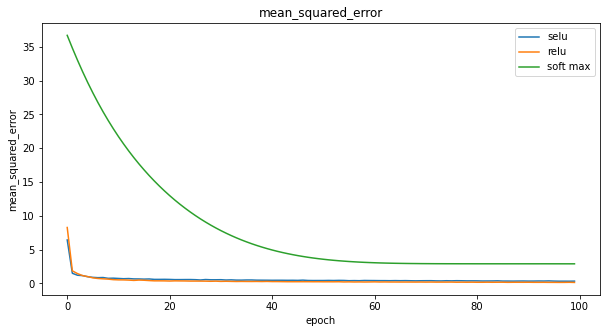

In [17]:
# list all data in history
print(selu_history.history.keys())
print(relu_history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (10,5))
plt.plot(selu_history.history['mean_squared_error'], label='selu')
# plt.plot(selu_history.history['val_mean_squared_error'], label='selu')
plt.plot(relu_history.history['mean_squared_error'], label='relu')
# plt.plot(relu_history.history['val_mean_squared_error'], label='relu')
plt.plot(soft_max_history.history['mean_squared_error'], label='soft max')
# plt.plot(soft_max_history.history['val_mean_squared_error'], label='soft max')
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend()
plt.show()
# # summarize history for loss
# plt.figure(figsize = (12,7))
# plt.plot(selu_history.history['loss'], label='selu')
# # plt.plot(selu_history.history['val_loss'], label='selu')
# plt.plot(relu_history.history['loss'], label='relu')
# # plt.plot(relu_history.history['val_loss'], label='relu')
# plt.plot(soft_max_history.history['loss'], label='soft max')
# # plt.plot(soft_max_history.history['val_loss'], label='soft max')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

In [18]:
a_selu = DNN_model_selu.predict(X_train)
train_mse = (mean_squared_error(a_selu, Y_train))
print('selu NN train_mse = ',train_mse)
b_selu =  DNN_model_selu.predict(X_test)
test_mse = (mean_squared_error(b_selu, Y_test))
print('selu NN test_mse = ', test_mse)

a_relu = DNN_model_relu.predict(X_train)
train_mse = (mean_squared_error(a_relu, Y_train))
print('relu NN train_mse = ',train_mse)
b_relu =  DNN_model_relu.predict(X_test)
test_mse = (mean_squared_error(b_relu, Y_test))
print('relu NN test_mse = ', test_mse)

a_soft_max = DNN_model_soft_max.predict(X_train)
train_mse = (mean_squared_error(a_relu, Y_train))
print('soft max NN train_mse = ',train_mse)
b_soft_max =  DNN_model_soft_max.predict(X_test)
test_mse = (mean_squared_error(b_relu, Y_test))
print('soft max NN test_mse = ', test_mse)

selu NN train_mse =  0.23578377088095737
selu NN test_mse =  0.2653961168805984
relu NN train_mse =  0.10641456191029831
relu NN test_mse =  0.17673821266209142
soft max NN train_mse =  0.10641456191029831
soft max NN test_mse =  0.17673821266209142


In [19]:

# # # # # # # # # # # # # # # # # # # # # # # Clustering:
def points_for_cluster_df(clustering_labels):
    hist_dictionary = {}
    for i in clustering_labels:
        if str(i) in hist_dictionary:
            hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
        else:
            hist_dictionary[str(i)] = 1
    clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
    clusters_names_numeric.sort()
    clusters_names = [str(name) for name in clusters_names_numeric]
    points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]
    clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
    clustering_hist_df.columns = clusters_names
    return clustering_hist_df


def plot_silhouette_score(clustering_method, clusters, s_scores):
    plt.plot(clusters, s_scores, color='blue', label='Silhouette score')
    plt.title(clustering_method + ' clustering Silhouette score depending on clusters number')
    plt.ylabel('Silhouette score')
    plt.xlabel('clusters')
    # plt.axhline(0, lw=0.5, color='black')
    # plt.axvline(0, lw=0.5, color='black')
    plt.legend()
    plt.show()



# BIRCH

In [20]:
birch_s_scores = []
clusters = range(2, 180)
for i in clusters:
    br = Birch(n_clusters=i).fit(X_train)
    birch_s_scores.append(silhouette_score(X_train, br.labels_))

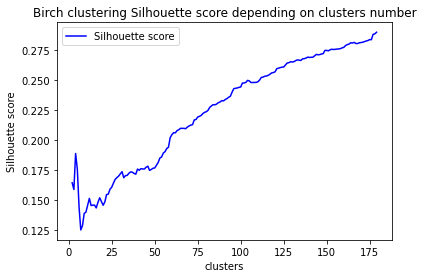

In [21]:
plot_silhouette_score('Birch', clusters, birch_s_scores)

In [22]:
# Optimize Birch clustering with 105 clusters:
optimize_br = Birch(n_clusters=105).fit(X_train)
points_for_cluster_df(optimize_br.labels_)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,63,35,20,35,29,33,21,29,52,6,...,6,1,8,4,7,10,6,10,15,27


# K-Means

In [23]:
km_s_scores = []
clusters = range(2, 180)
for i in clusters:
    k_means = KMeans(n_clusters=i, random_state=0).fit(X_train)
    km_s_scores.append(silhouette_score(X_train, k_means.labels_))

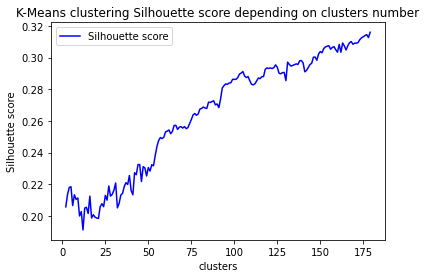

In [25]:
plot_silhouette_score('K-Means', clusters, km_s_scores)

In [26]:
# Optimize K-Means clustering 105 clusters:

optimize_km = KMeans(n_clusters=105, random_state=0).fit(X_train)
points_for_cluster_df(optimize_km.labels_)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,25,21,32,56,48,33,33,14,42,16,...,16,32,8,25,9,29,5,27,19,23


# MeanShift

In [27]:
# Optimize MeanShift clustering using estimate_bandwidth:

optimize_bandwidth = estimate_bandwidth(X_train)
optimize_ms = MeanShift(bandwidth=optimize_bandwidth).fit(X_train)
points_for_cluster_df(optimize_ms.labels_)

print(optimize_bandwidth)
print()


3.8471424931899283



### Predict qualities with the clusters mean quality

In [28]:
def mean_quality_for_cluster_dictionary(df, clustering):
    mean_qualities = {}
    for i in df[clustering].unique():
        mean_qualities[i] = df[df[clustering] == i]['quality'].mean()
    return mean_qualities


def cluster_mse_score(cluster_quality_dict: dict, test_cluster_lables: pd.Series, real_test_values: pd.Series):
    predicted_qualities = []
    for i in test_cluster_lables:
        predicted_qualities.append(cluster_quality_dict[i])
    predicted_qualities = pd.Series(predicted_qualities)
    return mean_squared_error(predicted_qualities, real_test_values)


train_with_clusters = X_train.copy()
train_with_clusters['quality'] = Y_train
# MeanShift:
train_with_clusters['ms_cluster'] = optimize_ms.labels_
ms_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'ms_cluster')
# Birch:
train_with_clusters['br_cluster'] = optimize_br.labels_
br_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'br_cluster')
# Kmeans
train_with_clusters['km_cluster'] = optimize_km.labels_
km_qualities_dict = mean_quality_for_cluster_dictionary(train_with_clusters, 'km_cluster')


print()
print('br_qualities_dict: ', br_qualities_dict)
print()
print('km_qualities_dict: ', km_qualities_dict)
print()
print('ms_qualities_dict: ', ms_qualities_dict)
print()

test = X_test.copy()
test['quality'] = Y_test

# Birch:
br_test_labels = optimize_br.predict(X_test)
print('Birch mse: ', cluster_mse_score(br_qualities_dict, br_test_labels, test['quality']))

# K-Means
km_test_labels = optimize_km.predict(X_test)
print('K-Means mse: ', cluster_mse_score(km_qualities_dict, km_test_labels, test['quality']))

# MeanShift:
ms_test_labels = optimize_ms.predict(X_test)
print('Mean Shift mse: ', cluster_mse_score(ms_qualities_dict, ms_test_labels, test['quality']))




br_qualities_dict:  {55: 5.333333333333333, 99: 6.428571428571429, 85: 4.319148936170213, 103: 4.466666666666667, 49: 7.78494623655914, 56: 4.583333333333333, 57: 6.571428571428571, 25: 4.529411764705882, 0: 5.063492063492063, 17: 7.431372549019608, 14: 7.159090909090909, 26: 6.782608695652174, 24: 6.466666666666667, 20: 5.44, 104: 7.777777777777778, 6: 6.904761904761905, 12: 4.608695652173913, 35: 5.153846153846154, 93: 7.694915254237288, 71: 5.666666666666667, 101: 5.166666666666667, 7: 6.068965517241379, 58: 5.454545454545454, 11: 6.076923076923077, 89: 7.857142857142857, 90: 3.0, 28: 4.733333333333333, 32: 6.461538461538462, 74: 6.625, 47: 7.586956521739131, 44: 3.0854271356783918, 43: 3.1451612903225805, 67: 6.611111111111111, 68: 5.3, 23: 6.785714285714286, 2: 5.15, 72: 7.622641509433962, 70: 6.5, 38: 4.4375, 53: 3.2903225806451615, 29: 5.15, 45: 6.235294117647059, 21: 4.944444444444445, 62: 5.428571428571429, 22: 5.928571428571429, 33: 3.5794392523364484, 48: 4.82051282051282, 

# Dimension Reduction

In [29]:
def printPrejections(reducted_df: pd.DataFrame, model_name: str):
    for i in range(0, 2):
        for j in range(i + 1, 3):
            plotName = model_name + ' (dim ' + str(i) + '),(dim ' + str(j) + ')'
            dim1 = '(dim ' + str(i) + ')'
            dim2 = '(dim ' + str(j) + ')'
            vis = pd.DataFrame()
            vis[dim1] = reducted_df[i]
            vis[dim2] = reducted_df[j]
            vis['Y'] = reducted_df['quality']
            plt.figure(figsize=(16, 10))
            sns.scatterplot(
                x=dim1, y=dim2,
                hue="Y",
                palette=sns.color_palette("hls", len(set(list(reducted_df['quality'])))),
                data=vis,
                legend="full",
                alpha=0.8
            ).set_title(plotName)
            plt.show()



## pca

[0.28993442 0.22235359 0.16048443]
[107.58202509  94.21323036  80.03985281]


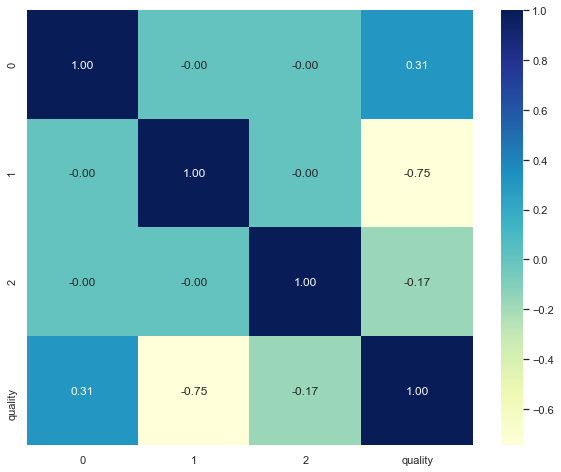

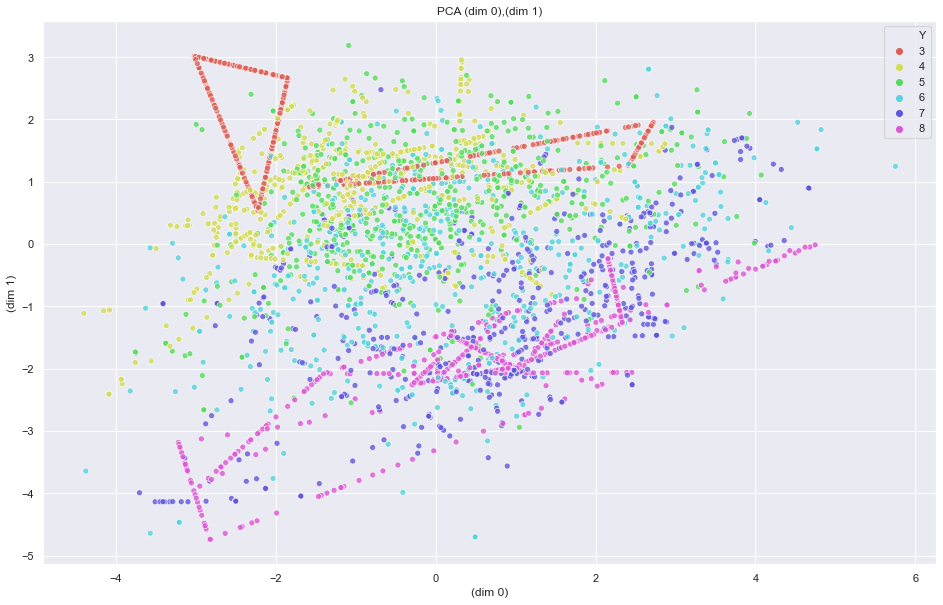

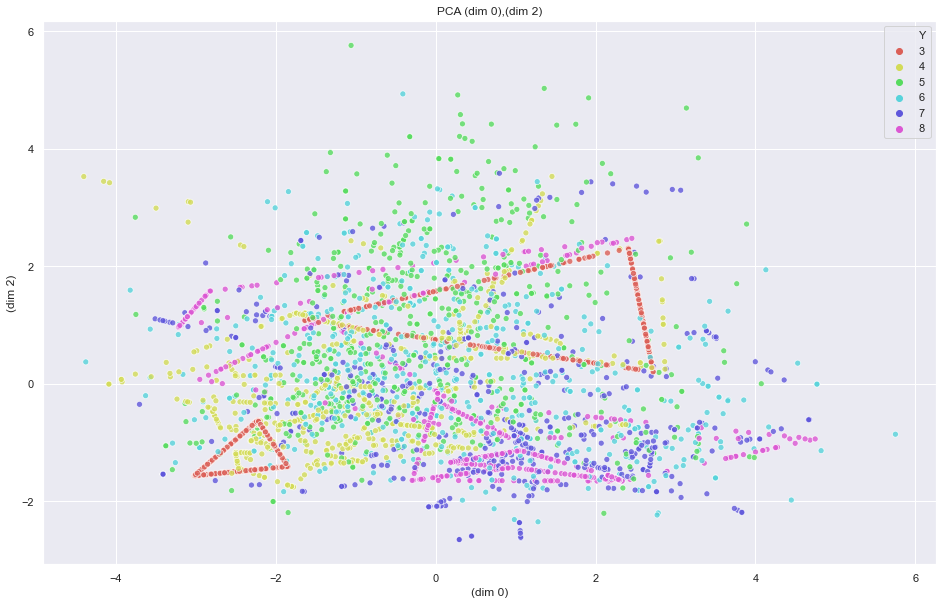

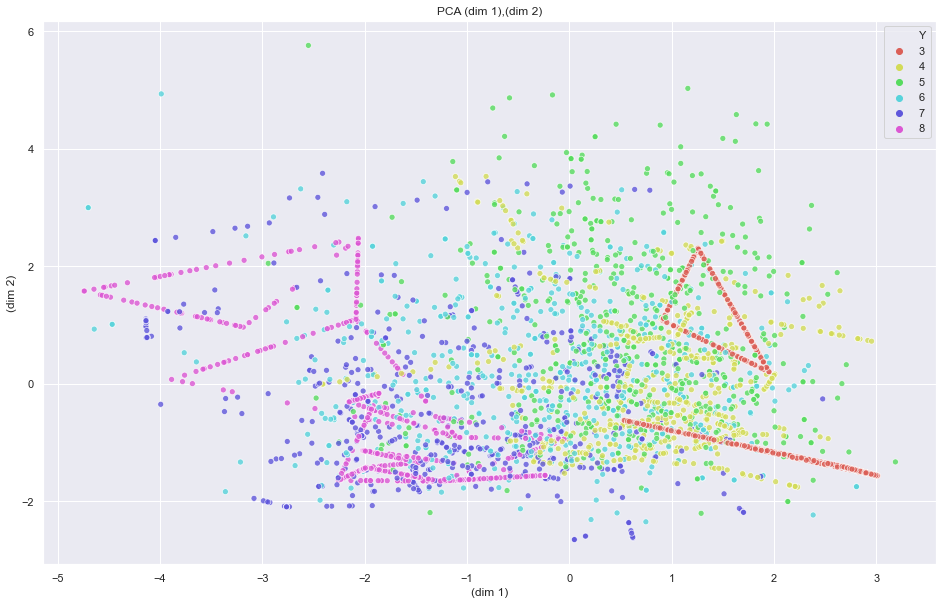

In [30]:
from sklearn.decomposition import PCA, IncrementalPCA

pca = IncrementalPCA(n_components=3)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

pca_df = pd.DataFrame(pca.transform(X))
pca_df['quality'] = Y

import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = pca_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(pca_df, 'PCA')


## Auto Encoder

Epoch 1/100
15/15 [==============================] - 2s 32ms/step - loss: 0.7074 - val_loss: 0.7057
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7043 - val_loss: 0.7057
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7059 - val_loss: 0.7056
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7075 - val_loss: 0.7055
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7051 - val_loss: 0.7054
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7073 - val_loss: 0.7053
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7072 - val_loss: 0.7052
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7059 - val_loss: 0.7052
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7062 - val_loss: 0.7051
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7055 - val_loss: 0.7050
Epoch 11

15/15 [==============================] - 0s 5ms/step - loss: 0.6982 - val_loss: 0.6973
Epoch 84/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6990 - val_loss: 0.6972
Epoch 85/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6993 - val_loss: 0.6971
Epoch 86/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6984 - val_loss: 0.6970
Epoch 87/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6983 - val_loss: 0.6969
Epoch 88/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6979 - val_loss: 0.6967
Epoch 89/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6972 - val_loss: 0.6966
Epoch 90/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6987 - val_loss: 0.6965
Epoch 91/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6982 - val_loss: 0.6964
Epoch 92/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6985 - val_loss: 0.6963
Epoch 93/100


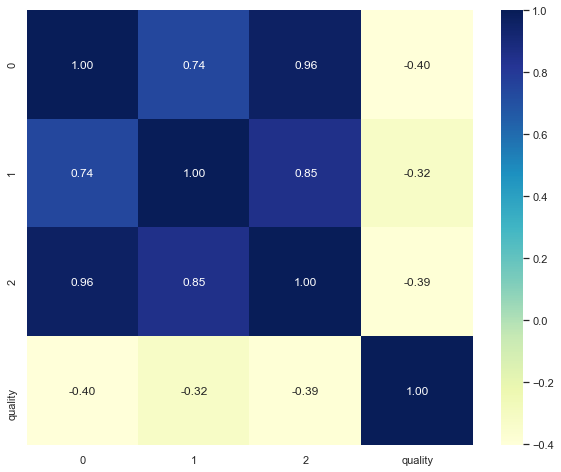

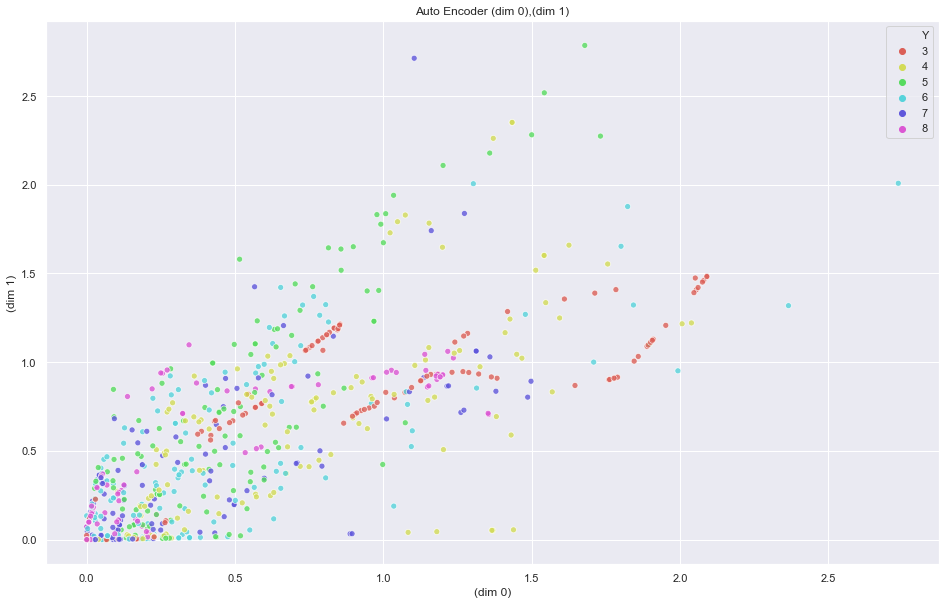

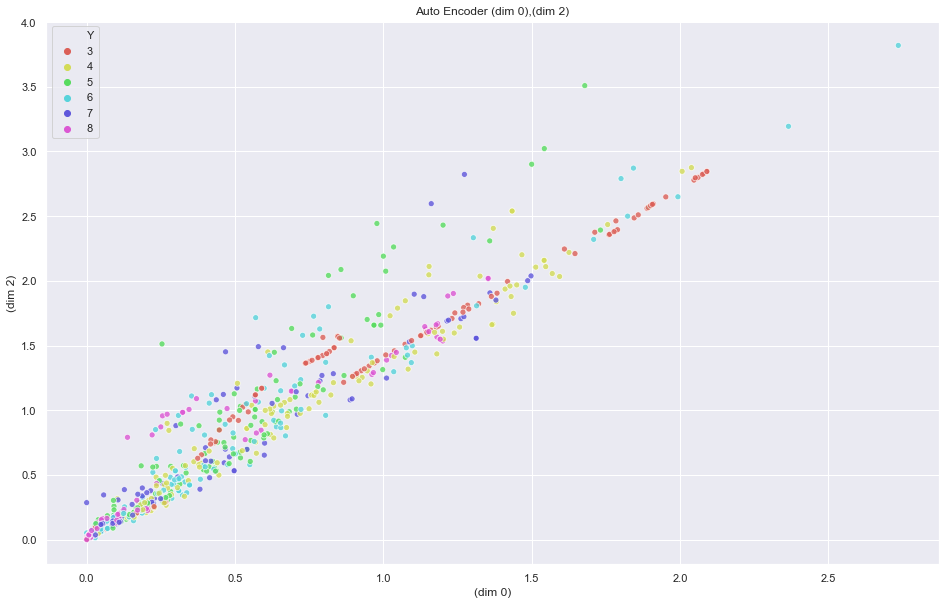

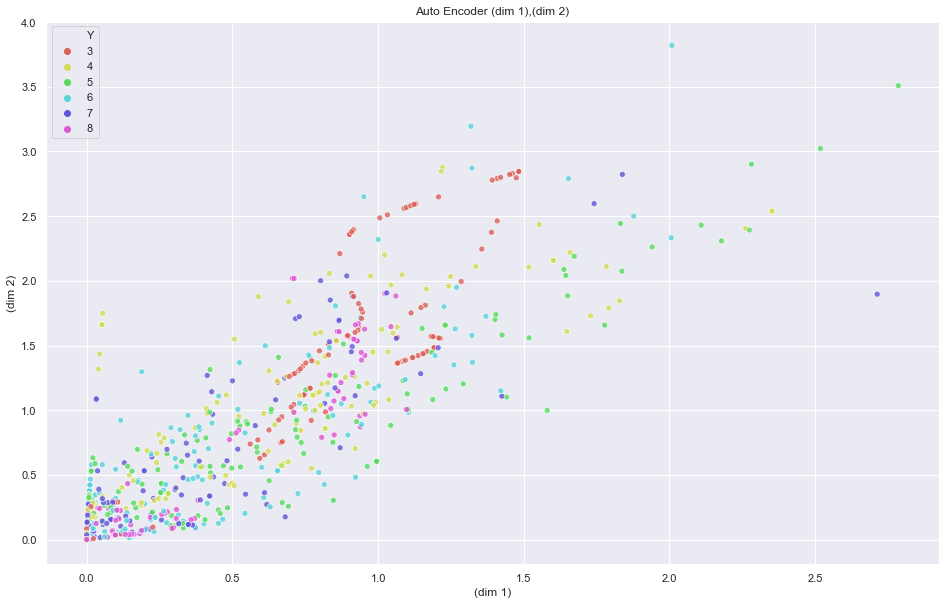

In [63]:
input_dim = Input(shape=(11,))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(19, activation='relu')(input_dim)
encoded2 = Dense(6, activation='relu')(encoded1)
encoded3 = Dense(4, activation='relu')(encoded2)
encoded4 = Dense(encoding_dim, activation='relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(4, activation='relu')(encoded4)
decoded2 = Dense(6, activation='relu')(decoded1)
decoded3 = Dense(19, activation='relu')(decoded2)
decoded4 = Dense(11, activation='sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=200, shuffle=True, validation_data=(X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape=(encoding_dim,))
encoded_out = encoder.predict(X_test)

AE_data = pd.DataFrame(encoded_out)
AE_data['quality'] = Y_test.values

sns.set(rc={'figure.figsize': (10, 8)})
corr = AE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(AE_data, 'Auto Encoder')


## LLE

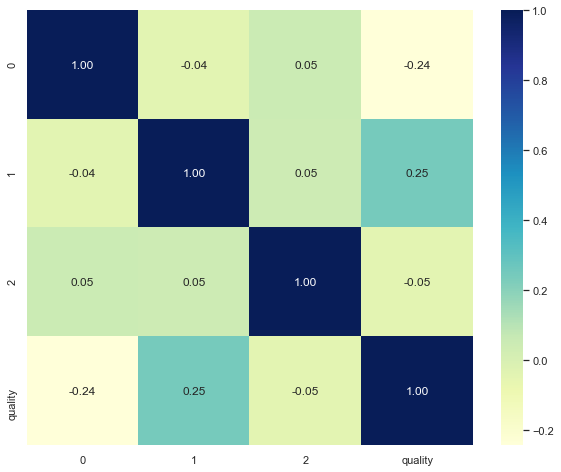

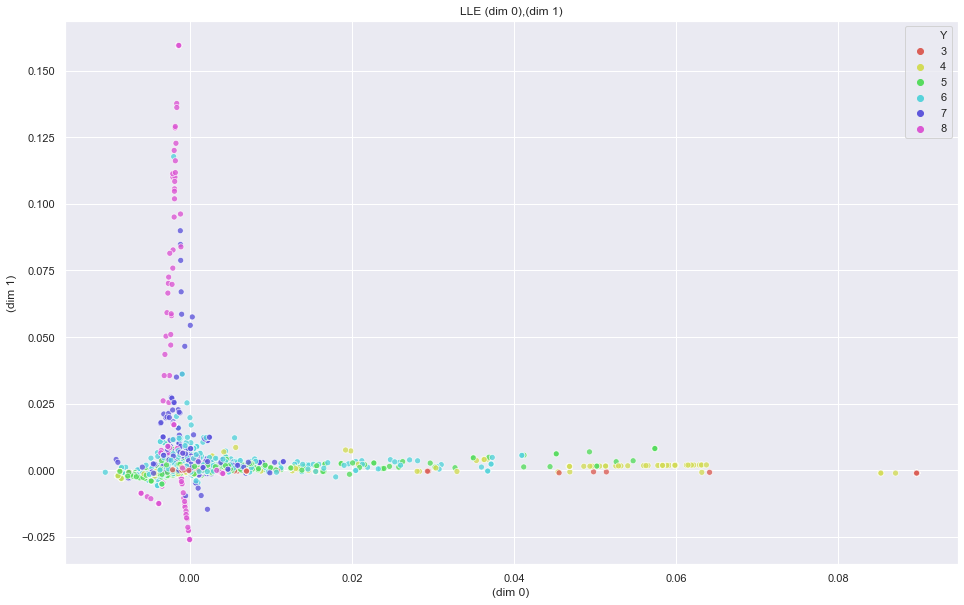

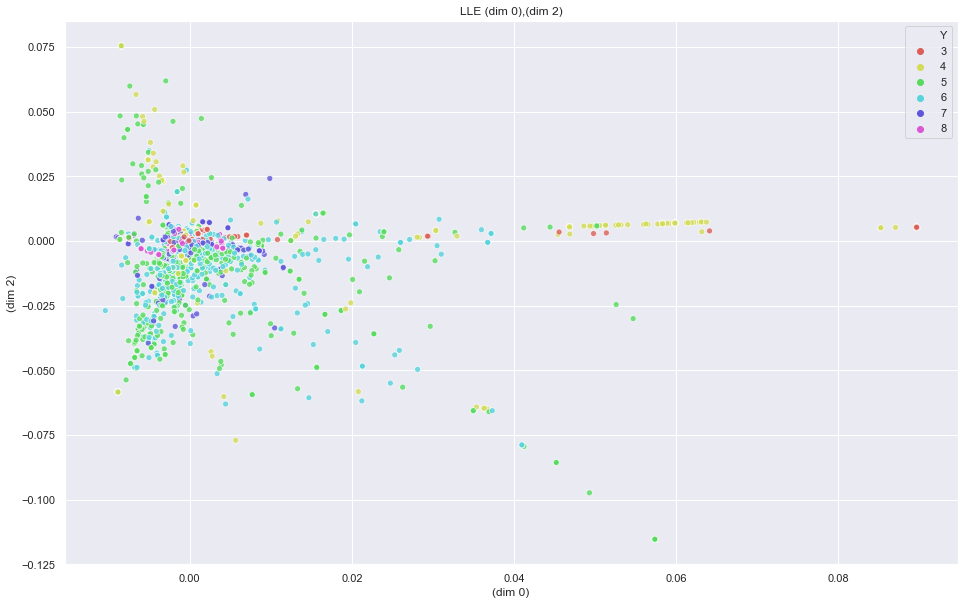

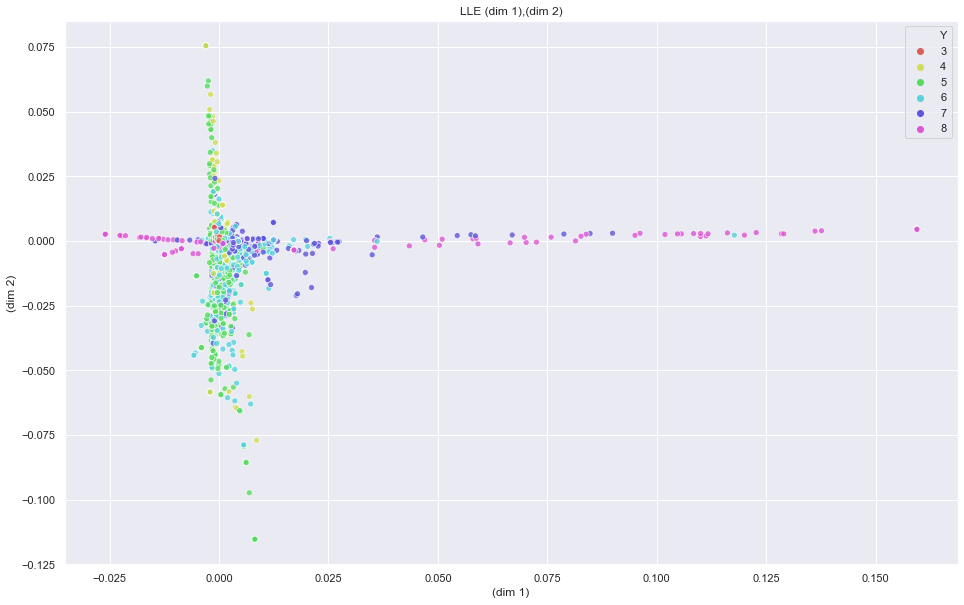

In [32]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform((X - X.mean()) / X.std())
X_transformed.shape

LLE_data = pd.DataFrame(X_transformed)
LLE_data['quality'] = Y.values
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})
corr = LLE_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()

printPrejections(LLE_data, 'LLE')


# Linear Models Compereson

In [33]:
import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


def continues_jacard(vec1: np.ndarray, vec2: np.ndarray):
    numerator = 0
    denominator = 0
    if len(vec1) == len(vec2):
        for i in range(0, len(vec1)):
            numerator += min(vec1[i], vec2[i])
            denominator += max(vec1[i], vec2[i])
        return numerator / denominator
    return -1


def vectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str):
    print(f'radial angle between {vec1_name} and {vec2_name} = {angle(vec1, vec2)}')
    print(f'***cosine test between {vec1_name} and {vec2_name} = {math.cos(angle(vec1, vec2))}***')
    print(f'euclidean distance between {vec1_name} and {vec2_name} = {np.linalg.norm(vec1-vec2)}')
    jac = continues_jacard(vec1, vec2)
    if jac != -1:
        print(f'jaccard score between {vec1_name} and {vec2_name} = {jac}')
    else:
        print(f'jaccard Error for {vec1_name} and {vec2_name}')


def threeVectorComperesion(vec1, vec1_name: str, vec2, vec2_name: str, vec3, vec3_name: str):
    print(f'{vec1_name} is {vec1}')
    print(f'{vec2_name} is {vec2}')
    print(f'{vec3_name} is {vec3}\n\n')

    print(f'magnitude of {vec1_name} is {np.linalg.norm(vec1)}')
    print(f'magnitude of {vec2_name} is {np.linalg.norm(vec2)}')
    print(f'magnitude of {vec3_name} is {np.linalg.norm(vec3)}\n\n')
    vec_list = [(vec1, vec1_name), (vec2, vec2_name), (vec3, vec3_name)]
    for i in range(0, 2):
        for j in range(i+1, 3):
            vectorComperesion(vec_list[i][0], vec_list[i][1], vec_list[j][0], vec_list[j][1])



In [34]:
red_file = 'clean_red.csv'
white_file = 'clean_white.csv'
red_data = pd.read_csv(red_file)
white_data = pd.read_csv(white_file)
all_data = pd.concat([red_data, white_data])

In [35]:
all_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
all_mean = all_data.drop(['quality'], axis=1).mean()
all_std = all_data.drop(['quality'], axis=1).std()
normalized_all_X = (all_data.drop(['quality'], axis=1) - all_mean) / all_std


normalized_red_X = (red_data.drop(['quality'], axis=1) - all_mean) / all_std
normalized_white_X = (white_data.drop(['quality'], axis=1) - all_mean) / all_std




red_X_train, red_X_test, red_y_train, red_y_test = \
    train_test_split(normalized_red_X, red_data['quality'], test_size=0.20, random_state=42)
white_X_train, white_X_test, white_y_train, white_y_test = \
    train_test_split(normalized_white_X, white_data['quality'], test_size=0.20, random_state=42)
all_X_train, all_X_test, all_y_train, all_y_test = \
    train_test_split(normalized_all_X, all_data['quality'], test_size=0.20, random_state=42)

### Linear Regrestion

In [37]:
red_lin_reg = LinearRegression().fit(red_X_train, red_y_train)
white_lin_reg = LinearRegression().fit(white_X_train, white_y_train)
all_lin_reg = LinearRegression().fit(all_X_train, all_y_train)

red_lin_reg_vec = np.array(red_lin_reg.coef_)
white_lin_reg_vec = np.array(white_lin_reg.coef_)
all_lin_reg_vec = np.array(all_lin_reg.coef_)

threeVectorComperesion(red_lin_reg_vec, 'red_lin_reg_vec', white_lin_reg_vec, 'white_lin_reg_vec',
                       all_lin_reg_vec, 'all_lin_reg_vec')


red_lin_reg_vec is [ 0.0347275  -0.15950826 -0.03279129 -0.06876337 -0.08394959  0.05825289
 -0.15279158 -0.09279339 -0.09874426  0.17957529  0.30861513]
white_lin_reg_vec is [ 0.17581354 -0.29497157 -0.0199349   0.46693191 -0.04500097  0.0990205
 -0.00817295 -0.6191895   0.14616413  0.10650135  0.12408832]
all_lin_reg_vec is [ 0.12062183 -0.19252791 -0.01279648  0.24175112 -0.00408151  0.13918144
 -0.14778723 -0.22739027  0.08238701  0.12822288  0.30301622]


magnitude of red_lin_reg_vec is 0.4605327105517885
magnitude of white_lin_reg_vec is 0.8830279859410304
magnitude of all_lin_reg_vec is 0.5640984538560425


radial angle between red_lin_reg_vec and white_lin_reg_vec = 1.2377675699438586
***cosine test between red_lin_reg_vec and white_lin_reg_vec = 0.3269068699615652***
euclidean distance between red_lin_reg_vec and white_lin_reg_vec = 0.8520250975059721
jaccard score between red_lin_reg_vec and white_lin_reg_vec = -0.9780349190885076
radial angle between red_lin_reg_vec and all_

In [40]:
print(f'Red and White T test   {stats.ttest_ind(red_lin_reg.coef_, white_lin_reg.coef_)}')
print(f'Red and All T Test   {stats.ttest_ind(red_lin_reg.coef_, all_lin_reg.coef_)}')
print(f'White and All T Test   {stats.ttest_ind(white_lin_reg.coef_, all_lin_reg.coef_)}')

Red and White T test   Ttest_indResult(statistic=-0.22952167143172894, pvalue=0.8207944635592725)
Red and All T Test   Ttest_indResult(statistic=-0.7176460258245057, pvalue=0.48127460710598624)
White and All T Test   Ttest_indResult(statistic=-0.27470264353707496, pvalue=0.7863623052960332)


### linear SVM

In [41]:
red_lin_SVM = svm.SVR(kernel='linear').fit(red_X_train, red_y_train)
white_lin_SVM = svm.SVR(kernel='linear').fit(white_X_train, white_y_train)
all_lin_SVM = svm.SVR(kernel='linear').fit(all_X_train, all_y_train)

red_lin_SVM_vec = np.array(red_lin_SVM.coef_[0])
white_lin_SVM_vec = np.array(white_lin_SVM.coef_[0])
all_lin_SVM_vec = np.array(all_lin_SVM.coef_[0])

threeVectorComperesion(red_lin_SVM_vec, 'red_lin_SVM_vec', white_lin_SVM_vec, 'white_lin_SVM_vec',
                       all_lin_SVM_vec, 'all_lin_SVM_vec')


red_lin_SVM_vec is [ 0.07233263 -0.12238735 -0.01669633  0.13229057 -0.04377325  0.04953777
 -0.14628704 -0.17391642 -0.05229372  0.19361631  0.32661502]
white_lin_SVM_vec is [ 0.15409876 -0.30242723 -0.02554576  0.40953487 -0.09979511  0.09953115
 -0.04130591 -0.50980742  0.16356793  0.12959816  0.16213417]
all_lin_SVM_vec is [ 0.11699622 -0.1835507  -0.01665482  0.23394141 -0.04111008  0.13426222
 -0.1592712  -0.19816067  0.09385233  0.15319191  0.3208739 ]


magnitude of red_lin_SVM_vec is 0.4908221926390221
magnitude of white_lin_SVM_vec is 0.7968017279381256
magnitude of all_lin_SVM_vec is 0.5674260930748762


radial angle between red_lin_SVM_vec and white_lin_SVM_vec = 0.7864018311110119
***cosine test between red_lin_SVM_vec and white_lin_SVM_vec = 0.7063967249077995***
euclidean distance between red_lin_SVM_vec and white_lin_SVM_vec = 0.5685709229391257
jaccard score between red_lin_SVM_vec and white_lin_SVM_vec = -0.6220597045995417
radial angle between red_lin_SVM_vec and all

In [42]:
print(f'Red and White T test   {stats.ttest_ind(red_lin_SVM.coef_[0], white_lin_SVM.coef_[0])}')
print(f'Red and All T Test   {stats.ttest_ind(red_lin_SVM.coef_[0], all_lin_SVM.coef_[0])}')
print(f'White and All T Test   {stats.ttest_ind(white_lin_SVM.coef_[0], all_lin_SVM.coef_[0])}')

Red and White T test   Ttest_indResult(statistic=0.08123554473341155, pvalue=0.9360620859401003)
Red and All T Test   Ttest_indResult(statistic=-0.30541435642088083, pvalue=0.7632065548921857)
White and All T Test   Ttest_indResult(statistic=-0.3101750342109804, pvalue=0.7596368489844038)


### PCA

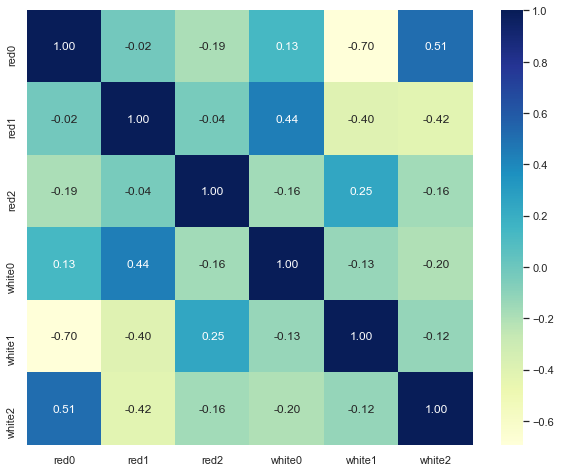

In [43]:
red_pca = IncrementalPCA(n_components=3)
white_pca = IncrementalPCA(n_components=3)
all_pca = IncrementalPCA(n_components=3)

red_pca.fit(normalized_red_X)
white_pca.fit(normalized_white_X)
all_pca.fit(normalized_all_X)

sns.set(rc={'figure.figsize': (10, 8)})
corr = pd.DataFrame(np.corrcoef(red_pca.components_,white_pca.components_),columns=['red0','red1','red2','white0','white1','white2'])
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
plt.show()
red_pca_vec_arr = [np.array(red_pca.components_[0]), np.array(red_pca.components_[1]), np.array(red_pca.components_[2])]
white_pca_vec_arr = [np.array(white_pca.components_[0]), np.array(white_pca.components_[1]), np.array(white_pca.components_[2])]
all_pca_vec_arr = [np.array(all_pca.components_[0]), np.array(all_pca.components_[1]), np.array(all_pca.components_[2])]



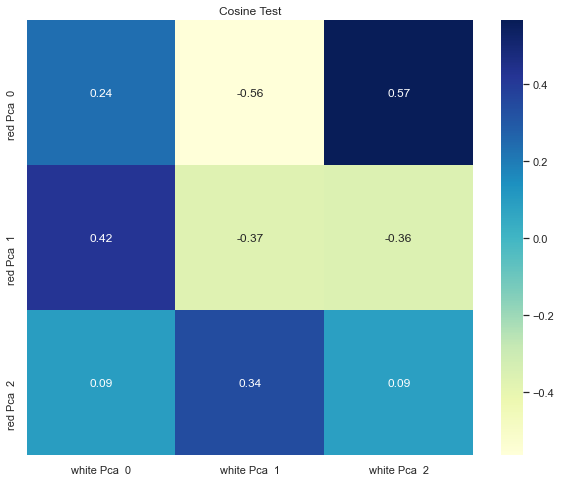

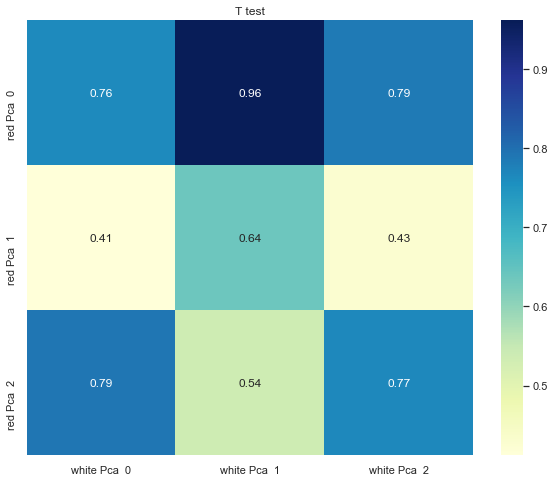

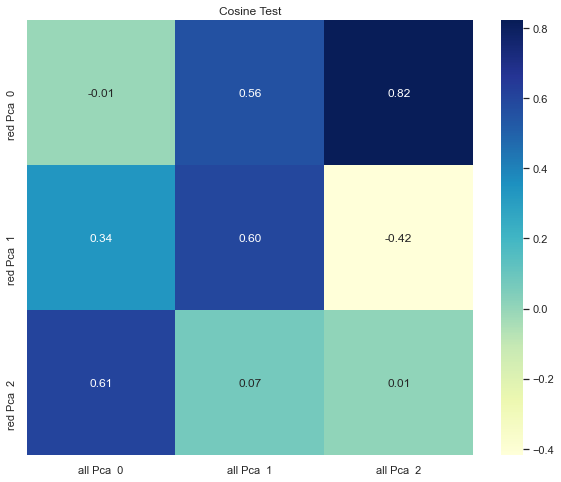

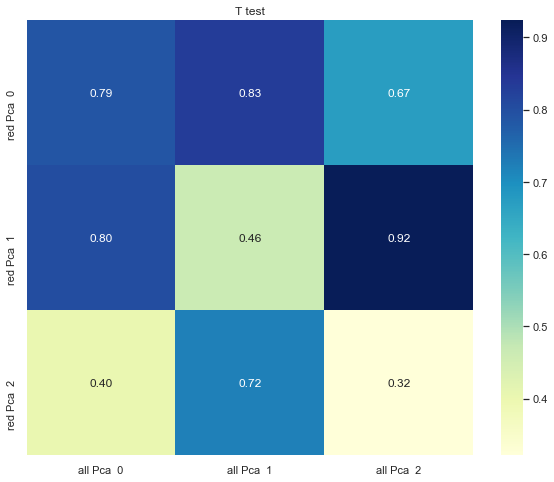

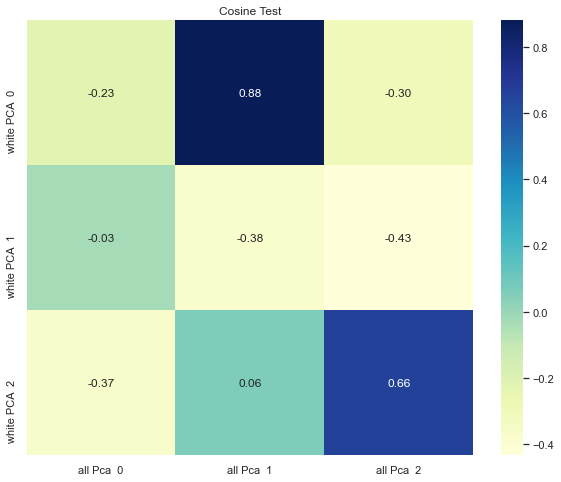

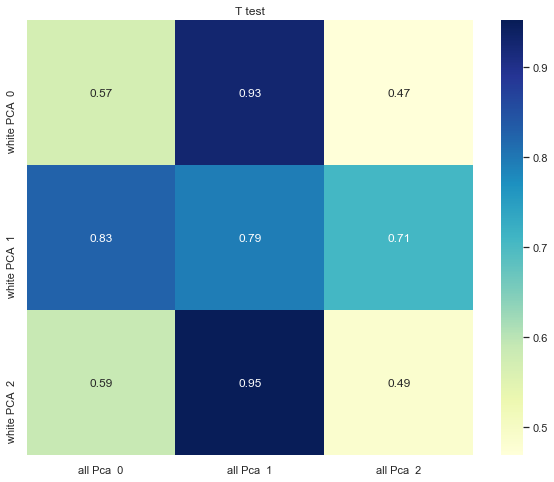

In [44]:
def compareTwoPCAs(PCA_vecs1, PCA_vecs1_name: str, PCA_vecs2, PCA_vecs2_name:str):
    table1 = []
    table2 = []
    for i in range(0,len(PCA_vecs1)):
        table1.append([])
        table2.append([])
        for j in range(0,len(PCA_vecs2)):
            table1[i].append(math.cos(angle(PCA_vecs1[i], PCA_vecs2[j])))
            table2[i].append(stats.ttest_ind(PCA_vecs1[i], PCA_vecs2[j]).pvalue)
    sns.set(rc={'figure.figsize': (10, 8)})
    df = pd.DataFrame(table1, columns=[PCA_vecs2_name+' 0', PCA_vecs2_name+' 1', PCA_vecs2_name+' 2'],
                        index=[PCA_vecs1_name+' 0', PCA_vecs1_name+' 1', PCA_vecs1_name+' 2'])
    ax = sns.heatmap(df,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
    ax.set_title('Cosine Test')
    plt.show()
    
    sns.set(rc={'figure.figsize': (10, 8)})
    df = pd.DataFrame(table2, columns=[PCA_vecs2_name+' 0', PCA_vecs2_name+' 1', PCA_vecs2_name+' 2'],
                        index=[PCA_vecs1_name+' 0', PCA_vecs1_name+' 1', PCA_vecs1_name+' 2'])
    ax = sns.heatmap(df,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f")
    ax.set_title('T test')
    plt.show()


compareTwoPCAs(red_pca_vec_arr, 'red Pca ', white_pca_vec_arr, 'white Pca ')
plt.show()
compareTwoPCAs(red_pca_vec_arr, 'red Pca ', all_pca_vec_arr, 'all Pca ')
plt.show()
compareTwoPCAs(white_pca_vec_arr, 'white PCA ', all_pca_vec_arr, 'all Pca ')
plt.show()

## Hypothesis Testing

In [45]:
from dc_stat_think import draw_bs_reps
# Making aliases
red_qu = np.array(red_data['quality'])
white_qu = np.array(white_data['quality'])

# Computing confidence intervals

"""if we repeated the measurements over and over again, 
95% of the observed values would lie withing the 95% confidence interval"""

# Compute the observed difference of the sample means: mean_diff
mean_diff = np.mean(white_qu)- np.mean(red_qu) 

# Get bootstrap replicates of means
red_replicates = draw_bs_reps(white_qu, np.mean, size=10000)
white_replicates = draw_bs_reps(red_qu, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
diff_replicates =  white_replicates - red_replicates

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2573768786728383 mm
95% confidence interval = [-0.30529162 -0.20921941] mm


In [46]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((red_qu, white_qu)))

# Shift the samples
# This is done because we are assuming in our Ho that means are equal!
red_shifted = red_qu - np.mean(red_qu) + combined_mean
white_shifted = white_qu - np.mean(white_qu) + combined_mean

# Get bootstrap replicates of shifted data sets
replicates_red = draw_bs_reps(red_shifted, np.mean, size=10000)
replicates_white = draw_bs_reps(white_shifted, np.mean, size=10000)

# Compute replicates of difference of means
diff_replicates = replicates_white - replicates_red

# Compute the p-value: p
p = np.sum(diff_replicates >= mean_diff) / len(diff_replicates)

# Print p-value
print('p-value = {0:.4f}'.format(p))

p-value = 0.0000


# Question number 3

## 3A- Exploring the learning ease of each attribute:

In [47]:
class Combination:
    def __init__(self, att_comb, mse):
        self.att_comb = att_comb
        self.mse = mse

    def get_att_comb(self):
        return self.att_comb

    def get_mse(self):
        return self.mse

    def get_number_of_atributes(self):
        return len(self.att_comb)


def calc_lin_reg_mse(X, combination, attribute_df) -> float:
    X_train, X_test, attribute_train, attribute_test = train_test_split(X[[col for col in combination]],
                                                                        attribute_df, test_size=0.18, random_state=42)
    reg = LinearRegression().fit(X_train, attribute_train)
    attribute_pred = reg.predict(X_test)

    return mean_squared_error(attribute_test, attribute_pred)


def open_tuple_with_dict(dictionary, tup):
    vals_list = [dictionary[i] for i in tup]
    return tuple(vals_list)


In [48]:
# # Linear regresion MSE of attribute,
# # depending on the number of attributes used in the learning process

attribute_combinations_list = []
for attribute in X.columns.tolist():
    attribute_df = X[attribute]
    current_X = X.drop([attribute], axis=1)
    attributes = X.columns.tolist()
    attributes.remove(attribute)
    attributes_dict = {}
    for i in range(10):
        attributes_dict[i] = attributes[i]
    current_X.columns = range(10)
    combinations_list = []
    for i in range(10):
        min_mse = float('inf')
        min_combination = ()
        for combination in combinations(range(10), i + 1):
            lin_reg_calc = calc_lin_reg_mse(current_X, combination, attribute_df)
            if lin_reg_calc < min_mse:
                min_mse = lin_reg_calc
                min_combination = combination
        min_combination = open_tuple_with_dict(attributes_dict, min_combination)
        combinations_list.append(Combination(min_combination, min_mse))
    attribute_combinations_list.append((attribute, combinations_list))

attribute = 'quality'
attribute_df = Y.copy()
current_X = X.copy()
attributes = X.columns.tolist()
attributes_dict = {}
for i in range(11):
    attributes_dict[i] = attributes[i]
current_X.columns = range(11)
combinations_list = []
for i in range(11):
    min_mse = float('inf')
    min_combination = ()
    for combination in combinations(range(11), i + 1):
        lin_reg_calc = calc_lin_reg_mse(current_X, combination, attribute_df)
        if lin_reg_calc < min_mse:
            min_mse = lin_reg_calc
            min_combination = combination
    min_combination = open_tuple_with_dict(attributes_dict, min_combination)
    combinations_list.append(Combination(min_combination, min_mse))
attribute_combinations_list.append((attribute, combinations_list))



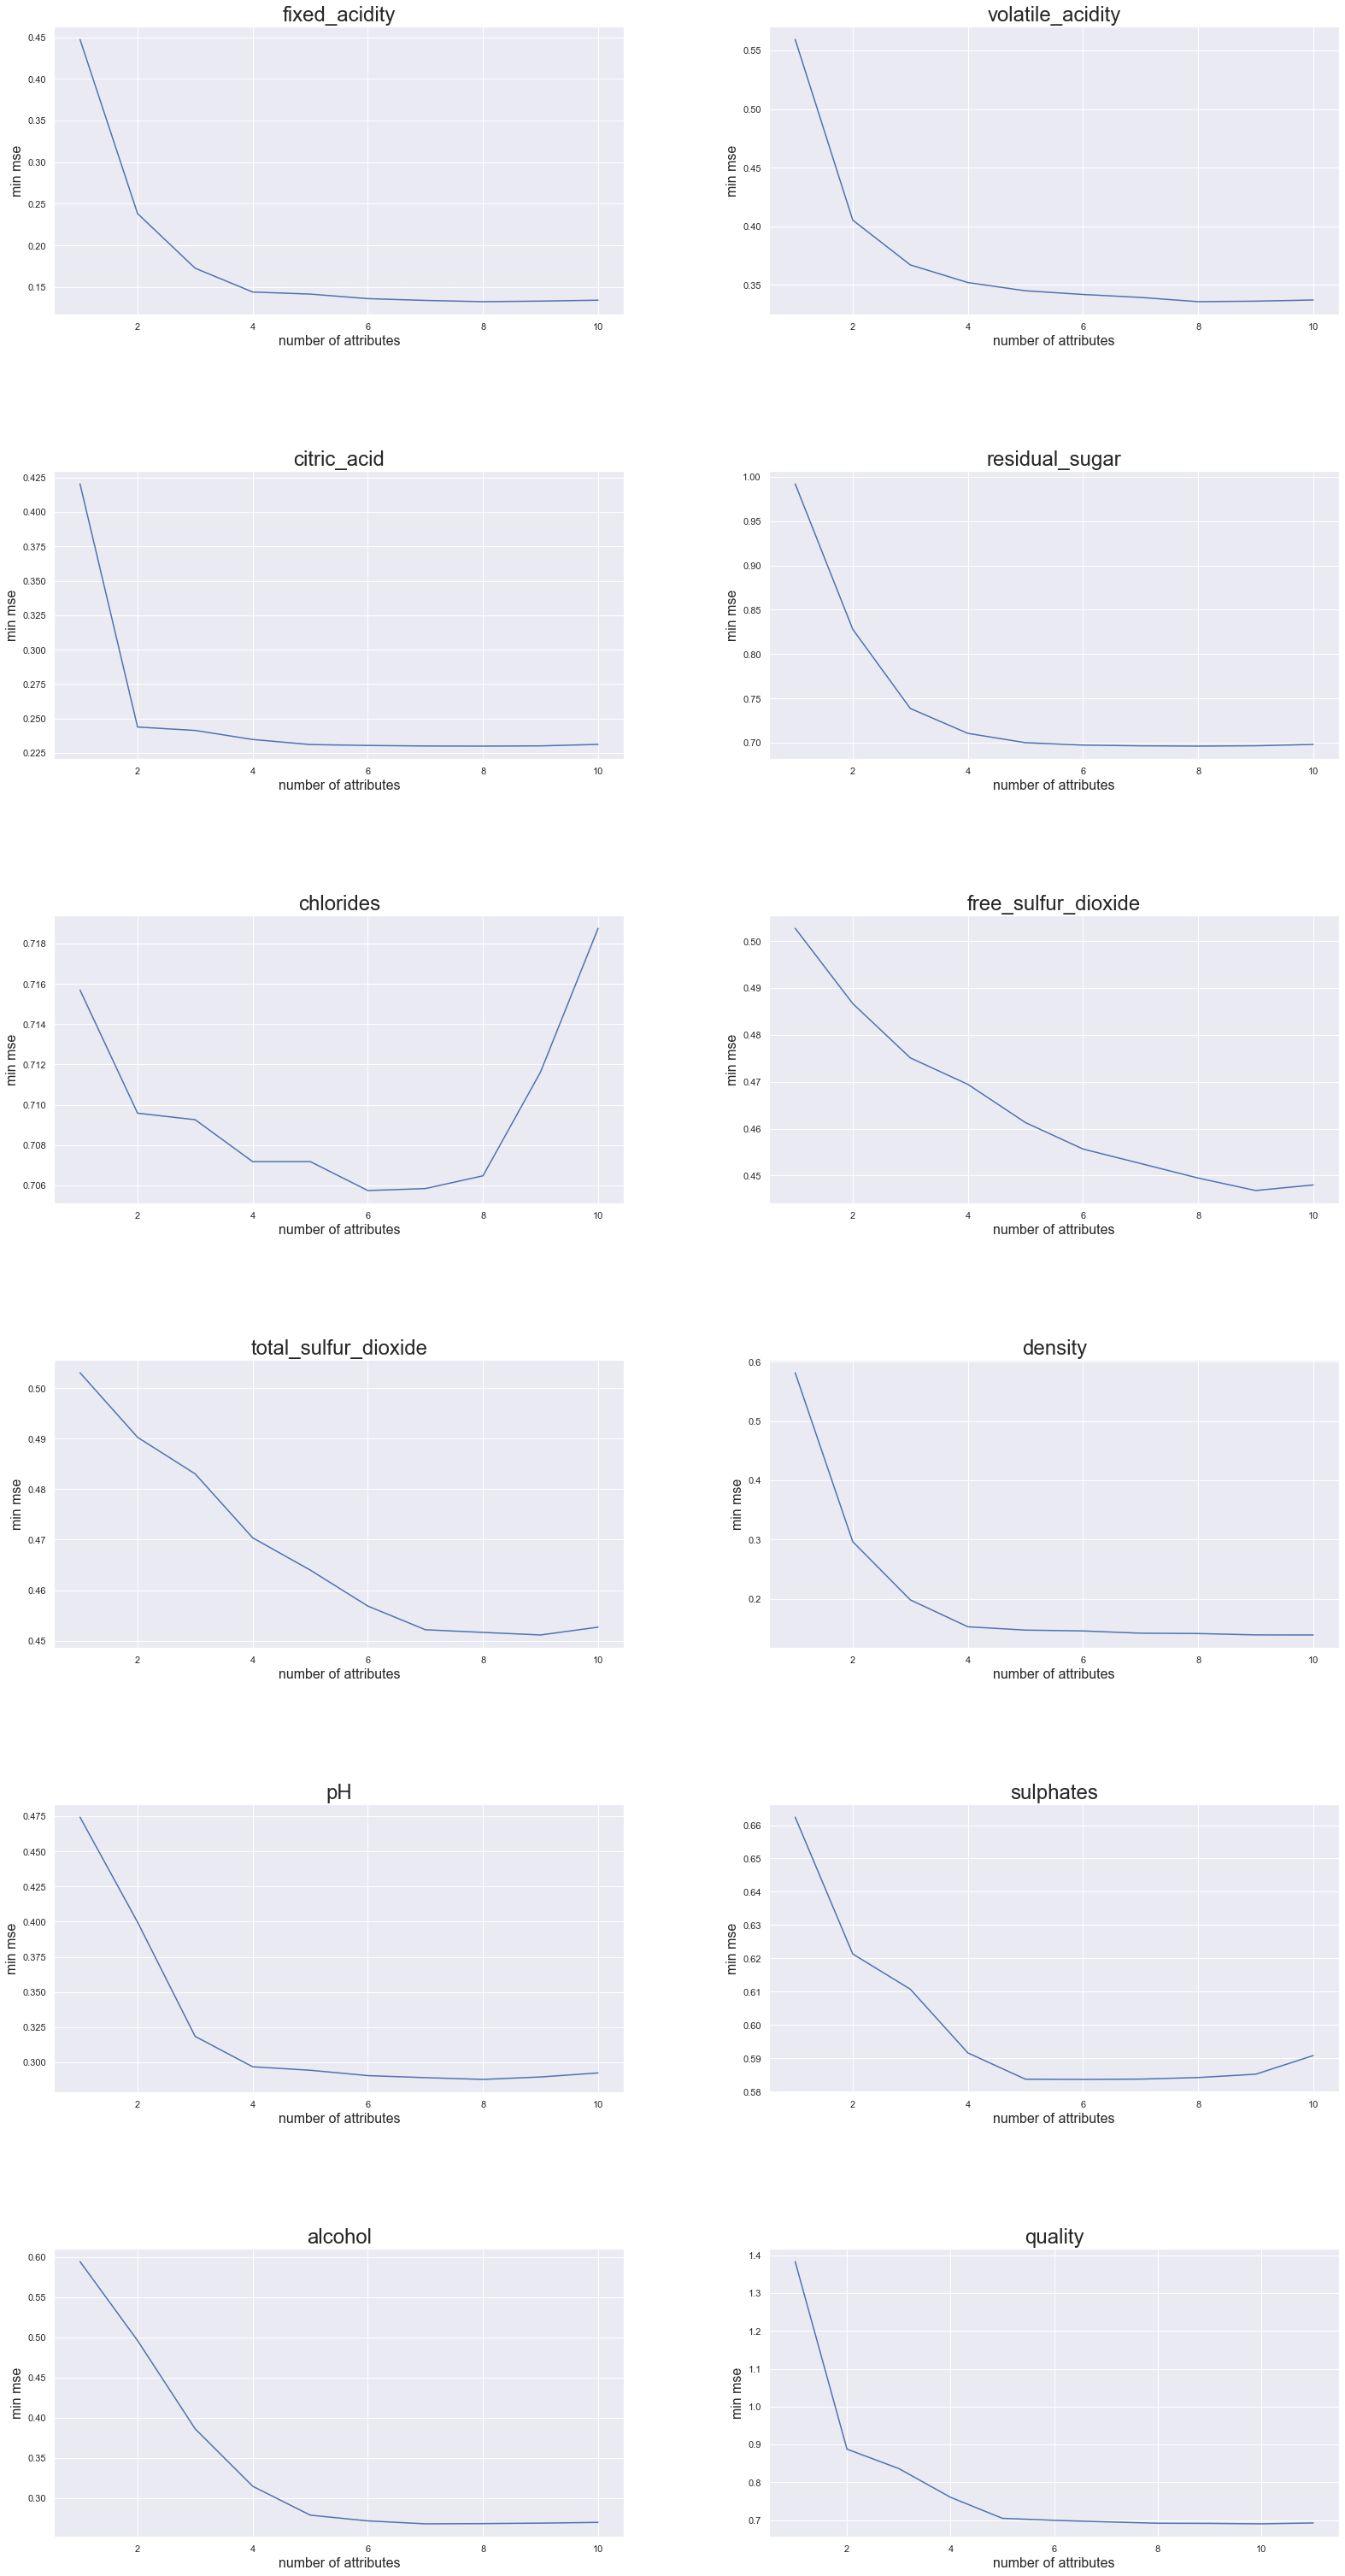

In [49]:
# %matplotlib inline
fig, axs = plt.subplots(6, 2, figsize=(25, 45))
for attribute in range(len(X.columns.tolist())):
    xs = [i + 1 for i in range(10)]
    ys = [comb.get_mse() for comb in attribute_combinations_list[attribute][1]]
    axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
    axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min mse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
    axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
    axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
# quality:
attribute = 11
xs = [i + 1 for i in range(11)]
ys = [comb.get_mse() for comb in attribute_combinations_list[attribute][1]]
axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min mse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
##
fig.tight_layout(pad=10.0)

In [50]:
# %matplotlib qt5
print('for ' + data.columns.tolist()[i] + ':')
for comb in attribute_combinations_list[i][1]:
    print('    for ' + str(comb.get_number_of_atributes()) + ' attributes combination: ')
    print('    the min mse is: ' + str(comb.get_mse()) + ', with the combination: ')
    print('    ' + str(comb.get_att_comb()))

for alcohol:
    for 1 attributes combination: 
    the min mse is: 0.594120679267498, with the combination: 
    ('density',)
    for 2 attributes combination: 
    the min mse is: 0.4959345133096132, with the combination: 
    ('residual_sugar', 'density')
    for 3 attributes combination: 
    the min mse is: 0.3862538357311305, with the combination: 
    ('fixed_acidity', 'residual_sugar', 'density')
    for 4 attributes combination: 
    the min mse is: 0.31485451864950864, with the combination: 
    ('fixed_acidity', 'residual_sugar', 'density', 'pH')
    for 5 attributes combination: 
    the min mse is: 0.27892924191812574, with the combination: 
    ('fixed_acidity', 'residual_sugar', 'density', 'pH', 'sulphates')
    for 6 attributes combination: 
    the min mse is: 0.2718052463688496, with the combination: 
    ('fixed_acidity', 'citric_acid', 'residual_sugar', 'density', 'pH', 'sulphates')
    for 7 attributes combination: 
    the min mse is: 0.26815375805104724, with the

For fixed_acidity,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('citric_acid', 'density', 'pH', 'alcohol')

For volatile_acidity,
we got the optimal result when learning with 3 attributes,
and those attributes are: ('citric_acid', 'density', 'sulphates')

For citric_acid,
we got the optimal result when learning with 2 attributes,
and those attributes are: ('fixed_acidity', 'volatile_acidity')

For residual_sugar,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('fixed_acidity', 'density', 'sulphates', 'alcohol')

For chlorides,
we got the optimal result when learning with 6 attributes,
and those attributes are: ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'alcohol')

For free_sulfur_dioxide,
we got the optimal result when learning with 9 attributes,
and those attributes are: ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_diox

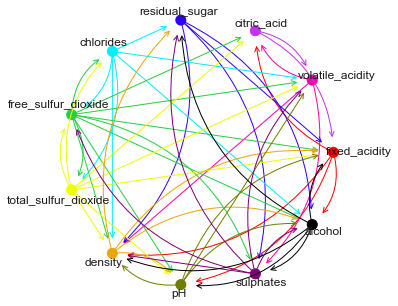

In [51]:
# %matplotlib qt5
# # 3B- Optimal result for the attributes learning
# Relies on the graphs above, using the elbow method.

def learn_attribute(attribute_placement, num_of_attributes, attribute_combinations_list):
    print('For ' + attribute_combinations_list[attribute_placement][0] + ',')
    print('we got the optimal result when learning with ' + str(num_of_attributes) + ' attributes,')
    print('and those attributes are: ' +
          str(attribute_combinations_list[attribute_placement][1][num_of_attributes - 1].get_att_comb()))


def print_optimal_learning_results(num_of_att_list, attribute_combinations_list):
    for i in range(11):
        learn_attribute(i, num_of_att_list[i], attribute_combinations_list)
        print()


num_of_att_list = [4, 3, 2, 4, 6, 9, 7, 4, 4, 5, 5]

print_optimal_learning_results(num_of_att_list, attribute_combinations_list)

n=11

colors = {}
colors_list = ['#FF0000', '#FF00A2', '#C332EF', '#2B00FF', '#00EFFF', '#29CD44', '#EFFF00', '#E9A70D',
              '#6E7F00', '#7F007A', '#000000']

attribute_to_index = {}

for i in range(len(X.columns.tolist())):
    colors[i] = colors_list[i]
    attribute_to_index[X.columns.tolist()[i]] = i


G = nx.MultiDiGraph()
columns = X.columns.tolist()
G.add_nodes_from(columns)

    
node_list = G.nodes()
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta
    
    
for attribute_placement in range(len(columns)):
    for j in range(num_of_att_list[attribute_placement]):
        G.add_edges_from([(attribute_combinations_list[attribute_placement][0],
                           attribute_combinations_list[attribute_placement][1][num_of_att_list[attribute_placement] - 1].get_att_comb()[j])])

existence_matrix = [[0 for j in range(11)] for i in range(11)]
for e in G.edges:
    num_of_same_edges = max(existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]],
                            existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]])
    existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]] = num_of_same_edges + 1
    existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]] = num_of_same_edges + 1

def edge_num(att1, att2):
    edge_num = existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] - 1
    existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] -= 1
    existence_matrix[attribute_to_index[att2]][attribute_to_index[att2]] -= 1
    return edge_num


color_map = []
for node in G:
    color_map.append(colors[attribute_to_index[node]])


# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(5,5))
margin=0.1
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')
    
    
pos=nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size = 100, alpha = 1, with_labels = True)
ax = plt.gca()

for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="<-", color=colors[attribute_to_index[e[0]]],
                                shrinkA=15, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*edge_num(e[0],e[1]))
                                ),
                                ),
               )
    
description = nx.draw_networkx_labels(G, pos)

factor_dic = {
    'fixed_acidity': (0.09,0),
    'volatile_acidity': (0.1,-0.02),
    'citric_acid': (0,-0.03),
    'residual_sugar': (0,-0.04),
    'chlorides': (0,-0.01),
    'free_sulfur_dioxide': (0,0.05),
    'total_sulfur_dioxide': (0,-0.05),
    'density': (0,0),
    'pH': (0,0.03),
    'sulphates': (0,0.025),
    'alcohol': (0,0),
}


r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1 + 0.1
    x_factor = factor_dic[str(node)][0]
    y_factor = factor_dic[str(node)][1]
    position = (radius*np.cos(angle_dict[node]) + x_factor, radius* np.sin(angle_dict[node]) + y_factor)
    t.set_position(position)
    t.set_clip_on(False)

plt.axis('off')
plt.show()

In [52]:
# %matplotlib qt5
learning_features = {}
for i in range(11):
    comb = attribute_combinations_list[i][1][num_of_att_list[i]]
    learning_features[data.columns.tolist()[i]] = comb.get_att_comb() 
    print('for ' + data.columns.tolist()[i] + ':')
    print('    for ' + str(comb.get_number_of_atributes()) + ' attributes combination: ')
    print('    the min mse is: ' + str(comb.get_mse()) + ', with the combination: ')
    print('    ' + str(comb.get_att_comb()))

print()
print(learning_features)
learning_features_list_of_tuples = [learning_features[feature] for feature in learning_features]
learning_features_list_of_lists = [[feature for feature in tup] for tup in learning_features_list_of_tuples]
learning_features_df = pd.DataFrame(learning_features_list_of_lists).T
learning_features_df.columns = [feature for feature in learning_features]
learning_features_df = learning_features_df.fillna(value='')
learning_features_df

for fixed_acidity:
    for 5 attributes combination: 
    the min mse is: 0.14161888948519052, with the combination: 
    ('citric_acid', 'residual_sugar', 'density', 'pH', 'alcohol')
for volatile_acidity:
    for 4 attributes combination: 
    the min mse is: 0.35207006454374673, with the combination: 
    ('citric_acid', 'density', 'pH', 'sulphates')
for citric_acid:
    for 3 attributes combination: 
    the min mse is: 0.24136387387722855, with the combination: 
    ('fixed_acidity', 'volatile_acidity', 'alcohol')
for residual_sugar:
    for 5 attributes combination: 
    the min mse is: 0.7001074452808217, with the combination: 
    ('fixed_acidity', 'volatile_acidity', 'density', 'sulphates', 'alcohol')
for chlorides:
    for 7 attributes combination: 
    the min mse is: 0.7058400210797483, with the combination: 
    ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'alcohol')
for free_sulfur_dioxide:
    for 10 attributes com

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,citric_acid,citric_acid,fixed_acidity,fixed_acidity,volatile_acidity,fixed_acidity,fixed_acidity,fixed_acidity,fixed_acidity,volatile_acidity,fixed_acidity
1,residual_sugar,density,volatile_acidity,volatile_acidity,residual_sugar,volatile_acidity,volatile_acidity,residual_sugar,volatile_acidity,residual_sugar,citric_acid
2,density,pH,alcohol,density,free_sulfur_dioxide,citric_acid,citric_acid,chlorides,citric_acid,free_sulfur_dioxide,residual_sugar
3,pH,sulphates,,sulphates,total_sulfur_dioxide,residual_sugar,chlorides,pH,density,density,density
4,alcohol,,,alcohol,density,chlorides,free_sulfur_dioxide,alcohol,alcohol,pH,pH
5,,,,,pH,total_sulfur_dioxide,density,,,alcohol,sulphates
6,,,,,alcohol,density,pH,,,,
7,,,,,,pH,sulphates,,,,
8,,,,,,sulphates,,,,,
9,,,,,,alcohol,,,,,


In [53]:
# learning_features_df.to_csv(r'C:\Users\tombe\Documents\bar-ilan\Machin Learning\Final Project\Red relationships.csv')

In [54]:
def learning_score(number_of_features, MSE):
    return math.sqrt(number_of_features)*MSE
    
    
    
num_of_att_list = [4, 3, 2, 4, 6, 9, 7, 4, 4, 5, 5]


learning_dict = {}
for i in range(0,11):
    comb = attribute_combinations_list[i][1][num_of_att_list[i]]
    learning_dict[data.columns.tolist()[i]] = learning_score(comb.get_number_of_atributes(), comb.get_mse())
    print(f'the learning score for {data.columns.tolist()[i]} is:  {learning_score(comb.get_number_of_atributes(), comb.get_mse())}')

print({k: v for k, v in sorted(learning_dict.items(), key=lambda item: item[1])})

the learning score for fixed_acidity is:  0.31666946378691624
the learning score for volatile_acidity is:  0.7041401290874935
the learning score for citric_acid is:  0.41805449266700634
the learning score for residual_sugar is:  1.5654878392016318
the learning score for chlorides is:  1.8674771611736025
the learning score for free_sulfur_dioxide is:  1.4166985876567093
the learning score for total_sulfur_dioxide is:  1.277429706401636
the learning score for density is:  0.32916136930754636
the learning score for pH is:  0.6581664950160543
the learning score for sulphates is:  1.4296886989994155
the learning score for alcohol is:  0.6657841630151518
{'fixed_acidity': 0.31666946378691624, 'density': 0.32916136930754636, 'citric_acid': 0.41805449266700634, 'pH': 0.6581664950160543, 'alcohol': 0.6657841630151518, 'volatile_acidity': 0.7041401290874935, 'total_sulfur_dioxide': 1.277429706401636, 'free_sulfur_dioxide': 1.4166985876567093, 'sulphates': 1.4296886989994155, 'residual_sugar': 1.

# World's greatest grape

In [55]:
unnormal = pd.read_csv(oversampled_clean_data_FN).drop(['quality'], axis=1)
mean = unnormal.mean()
std = unnormal.std()

In [56]:
def CustumLossFunctionSVM_rbf(x: list):
    X_df = pd.DataFrame([x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])
    prediction_value = SVR_rbf.predict(X_df)
    while type(prediction_value) == np.ndarray:
        prediction_value = prediction_value[0]
    return abs(10 - prediction_value)

def CustumLossFunctionDNN(x: list):
    X_df = pd.DataFrame([x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])
    prediction_value = DNN_model_relu.predict(X_df)
    while type(prediction_value) == np.ndarray:
        prediction_value = prediction_value[0]
    return abs(10 - prediction_value)


methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr']

In [57]:
min_error = 100
best_method = ''
x0 = list(data[data.quality == data.quality.max()].mean().to_frame().T.drop(['quality'], axis=1).values[0])
print(x0)
for m in methods:
    res = minimize(CustumLossFunctionSVM_rbf, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunctionSVM_rbf, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN relu score: ', DNN_model_relu.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

[0.04386924372727267, -0.7236646766264456, 0.5865282338909087, -0.13895065302479356, -0.6298754332776866, -0.04913601801818189, -0.200311973013223, -0.7677614049570249, -0.5213186571520666, 0.8636006569305765, 1.0635237220446283]
Nelder-Mead
0.6325484527660894
best grape SVR_rbf score:  9.36745154723391
best grape DNN relu score:  8.462144
best grape SVR_lin score:  8.345339856942317
best grape SVR_poly score:  10.295033217758014
best grape Linear regression score:  8.008792370869429


In [58]:
pd.DataFrame([res.x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])*std+mean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.59655,0.440636,0.537855,1.838711,0.065493,4.69307,6.304721,0.994625,3.140999,0.817361,11.918585


In [59]:
min_error = 100
best_method = ''
x0 = list(data[data.quality == data.quality.max()].mean().to_frame().T.drop(['quality'], axis=1).values[0])
print(x0)
for m in methods:
    res = minimize(CustumLossFunctionDNN, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun < min_error:
        best_method = m
        min_error = res.fun

print(best_method)
print(min_error)
res = minimize(CustumLossFunctionDNN, x0, method=best_method, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ', SVR_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN relu score: ', DNN_model_relu.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ', SVR_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ', SVR_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regression score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

[0.04386924372727267, -0.7236646766264456, 0.5865282338909087, -0.13895065302479356, -0.6298754332776866, -0.04913601801818189, -0.200311973013223, -0.7677614049570249, -0.5213186571520666, 0.8636006569305765, 1.0635237220446283]


c:\program files\python37\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
c:\program files\python37\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
c:\program files\python37\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations

Powell
0.0
best grape SVR_rbf score:  5.750592023219079
best grape DNN relu score:  10.0
best grape SVR_lin score:  13.642672930457476
best grape SVR_poly score:  18.817683300171456
best grape Linear regression score:  13.285158364390778


In [60]:
pd.DataFrame([res.x], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                                      'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                      'density', 'pH', 'sulphates', 'alcohol'])*std+mean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3.297905,0.123879,0.476082,2.591189,0.038108,11.549862,8.416224,0.996048,2.764452,0.723089,14.752166
